In [1]:
#importing the modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

There are 16 columns (15 independent variables and 1 target variable) and 730 data points.

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing or null values in the dataset.

In [5]:
# Dropping duplicate records

df.drop_duplicates(inplace=True)
df.shape

(730, 16)

There are no duplicate records in the data as the number of data points remain the same after dropping duplicates.

In [6]:
# dropping unnecessary columns
#   instant: contains only index
#   dteday: yr, mnth, weekday contain the date
#   casual & registered: cnt contains the total of both these columns and will be used as the target variable

df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
print("Shape: ", df.shape)
df.info()

Shape:  (730, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


After dropping these columns we now have 12 columns.

In [7]:
# Converting categorical columns (season, yr, mnth, weekday, weathersit) from numbered encodings to strings

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weekday'] = df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

In [8]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

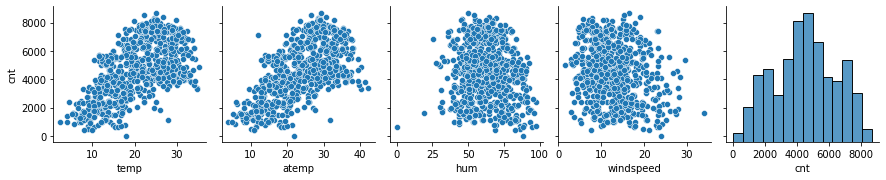

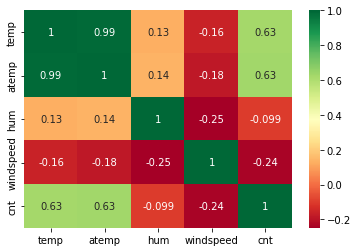

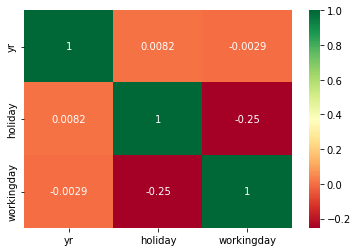

In [9]:
# pairplot of all the numeric columns for count

sns.pairplot(data = df, x_vars=numeric_cols, y_vars='cnt')
plt.show()

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="RdYlGn")
plt.show()

sns.heatmap(df[categorical_cols].corr(), annot=True, cmap="RdYlGn")
plt.show()

- Temperature and Feeling Temperature have a positive correlation with the target variable.

- Humidity and Wind speed seems to have a weak negative correlation with the target variable.

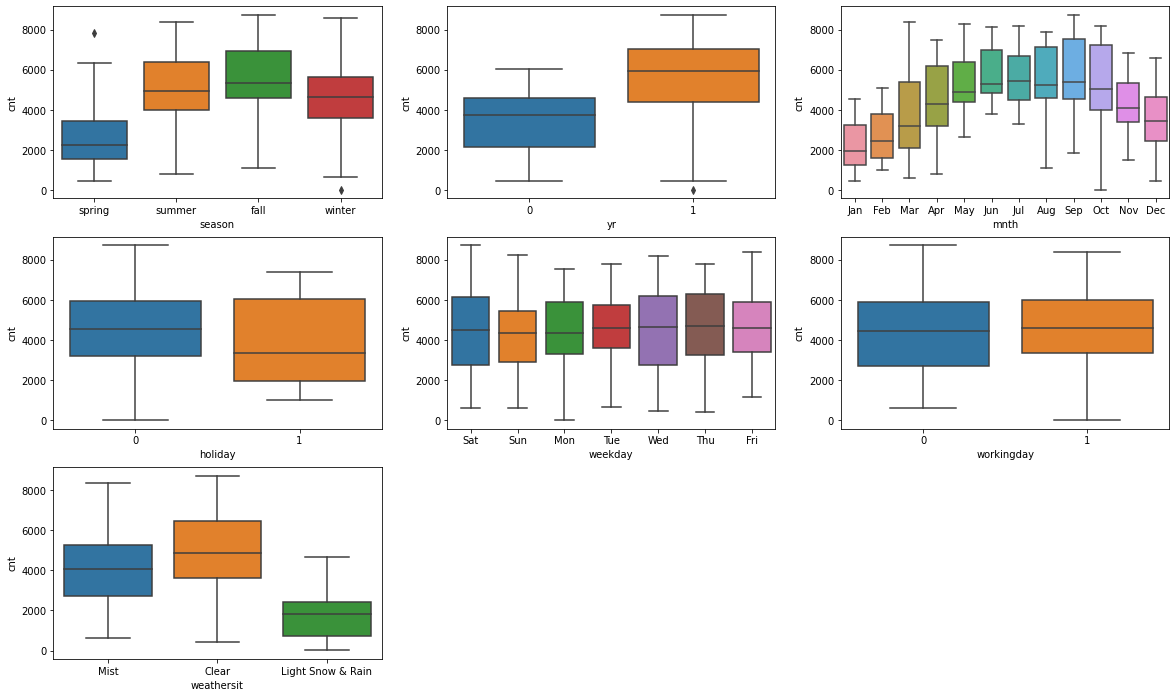

In [10]:
# visualizing categorical variables

plt.figure(figsize=(20, 12))

for idx, column in enumerate(categorical_cols):
  plt.subplot(3, 3, idx+1)
  sns.boxplot(data=df, x=column, y='cnt')

plt.show()

- Total rental bikes are more during the fall season.
- Compared to 2018, many people have rented bikes in 2019.
- September & October have the highest count of rentals.
- Rental bikes are more when the weather is clear.

# Data Preparation

## Creating dummy variables

In [11]:
# Creating dummy variables for categorical variables

df = pd.get_dummies(data=df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
print(df.columns)
df.head()

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Snow & Rain', 'weathersit_Mist'],
      dtype='object')


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


The attribute ```drop_first=True``` is used because, to represent a variable with n different unique values, it it enough to have n-1 variables.

## Splitting the data


In [203]:
# splitting into train and test sets

train_df, test_df = train_test_split(df, test_size=0.3, random_state=152)
print(f"Train shape: {train_df.shape}\n Test shape: {test_df.shape}")

Train shape: (511, 30)
 Test shape: (219, 30)


- 70% of the data is used to train the model and the rest 30% of the data is used to test the model.
- Random state of 121 is set so that the same random split of the data is made each time the notebook is run.

## Scaling the columns using Min-Max scaler


In [204]:
scaler = MinMaxScaler()

scaler.fit(train_df)
train_df[train_df.columns] = scaler.transform(train_df)

train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist
523,1.0,0.0,1.0,0.734271,0.685912,0.357827,0.315400,0.887483,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.0,0.0,0.0,0.525009,0.521864,0.677848,0.344863,0.516452,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
88,0.0,0.0,1.0,0.270351,0.272855,0.586262,0.310256,0.174183,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
95,0.0,0.0,1.0,0.391036,0.396916,0.361554,0.496157,0.320525,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
548,1.0,0.0,1.0,0.909208,0.829944,0.388711,0.214083,0.763691,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


- The scaler is fit only fit and then transformed separately as the same scaler will be used to transform the test dataset too

In [205]:
# splitting out the independent and dependent variables

y_train = train_df['cnt']
X_train = train_df.loc[:, train_df.columns != 'cnt']

y_test = test_df['cnt']
X_test = test_df.loc[:, test_df.columns != 'cnt']

# Model Building

In [206]:
# Using RFE to select the top 15 features from the dataset

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

top_n_features = 15
rfe = RFE(linear_model, n_features_to_select=top_n_features)
rfe = rfe.fit(X_train, y_train)

for col, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_):
  print(f"Columns: {col}, Selected: {support}, Rank: {rank}")

selected_cols = list(X_train.columns[rfe.support_])
print("\n The Following columns are selected by RFE:\n", selected_cols)

Columns: yr, Selected: True, Rank: 1
Columns: holiday, Selected: True, Rank: 1
Columns: workingday, Selected: False, Rank: 4
Columns: temp, Selected: True, Rank: 1
Columns: atemp, Selected: True, Rank: 1
Columns: hum, Selected: True, Rank: 1
Columns: windspeed, Selected: True, Rank: 1
Columns: season_spring, Selected: True, Rank: 1
Columns: season_summer, Selected: False, Rank: 14
Columns: season_winter, Selected: True, Rank: 1
Columns: mnth_Aug, Selected: False, Rank: 11
Columns: mnth_Dec, Selected: True, Rank: 1
Columns: mnth_Feb, Selected: False, Rank: 2
Columns: mnth_Jan, Selected: True, Rank: 1
Columns: mnth_Jul, Selected: True, Rank: 1
Columns: mnth_Jun, Selected: False, Rank: 15
Columns: mnth_Mar, Selected: False, Rank: 13
Columns: mnth_May, Selected: False, Rank: 5
Columns: mnth_Nov, Selected: True, Rank: 1
Columns: mnth_Oct, Selected: False, Rank: 12
Columns: mnth_Sep, Selected: True, Rank: 1
Columns: weekday_Mon, Selected: False, Rank: 6
Columns: weekday_Sat, Selected: False,

In [207]:
# method to build linear model and print summary
def build_OLS_model(x_df, y_df):
  x_df = sm.add_constant(x_df)
  lr_model_sm = sm.OLS(y_df, x_df).fit()
  print(lr_model_sm.summary())
  return lr_model_sm

In [208]:
# method to print the VIF for given dataset
def getVIF(dataset):
  vif_df = pd.DataFrame()
  vif_df['Features'] = dataset.columns
  vif_df['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
  vif_df['VIF'] = round(vif_df['VIF'], 2)
  vif_df = vif_df.sort_values("VIF", ascending = False)
  return vif_df

In [209]:
# Looking at the VIF of the RFE selected columns

getVIF(X_train[selected_cols])

,Features,VIF
3,atemp,307.88
2,temp,298.27
4,hum,16.81
5,windspeed,4.84
6,season_spring,2.92
7,season_winter,2.68
14,weathersit_Mist,2.42
0,yr,2.04
11,mnth_Nov,1.79
9,mnth_Jan,1.72


In [210]:
# Building a model on the columns selected by RFE

lr_model_rfe = build_OLS_model(X_train[selected_cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.11e-188
Time:                        17:38:01   Log-Likelihood:                 526.99
No. Observations:                 511   AIC:                            -1022.
Df Residuals:                     495   BIC:                            -954.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- The R-Squared value is ~ 0.84.
- All the selected variables should have a VIF <= 5 and a p-value < 0.05.

- Variables with VIF > 5 should be removed.
- ```atemp``` has a high VIF > 5. We can drop it.

In [211]:
X_train.drop(['atemp'], axis=1, inplace=True)
selected_cols.remove('atemp')
getVIF(X_train[selected_cols])

,Features,VIF
3,hum,16.23
2,temp,12.61
4,windspeed,4.82
5,season_spring,2.89
6,season_winter,2.64
13,weathersit_Mist,2.41
0,yr,2.04
10,mnth_Nov,1.79
8,mnth_Jan,1.72
7,mnth_Dec,1.54


In [212]:
# Building a model after dropping atemp

lr_model_rfe = build_OLS_model(X_train[selected_cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.26e-189
Time:                        17:38:03   Log-Likelihood:                 526.50
No. Observations:                 511   AIC:                            -1023.
Df Residuals:                     496   BIC:                            -959.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- We can see that ```hum (humidity)``` has a VIF of  which is greater than 5. So we can remove that too.



In [213]:
X_train.drop(['hum'], axis=1, inplace=True)
selected_cols.remove('hum')
getVIF(X_train[selected_cols])

,Features,VIF
2,temp,4.96
3,windspeed,4.81
4,season_spring,2.44
5,season_winter,2.39
0,yr,2.03
9,mnth_Nov,1.75
7,mnth_Jan,1.67
12,weathersit_Mist,1.51
6,mnth_Dec,1.50
8,mnth_Jul,1.40


In [214]:
# Building a model after dropping workingday

lr_model_rfe = build_OLS_model(X_train[selected_cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.55e-186
Time:                        17:38:09   Log-Likelihood:                 515.87
No. Observations:                 511   AIC:                            -1004.
Df Residuals:                     497   BIC:                            -944.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- The VIF and the p-value looks good for all the selected variables.
- Also, the F-sstatistic is 196.6 > 1 and the p-value is very close to zero. So let us proceed to the next step.

## Correlation of the selected variables with the target variable

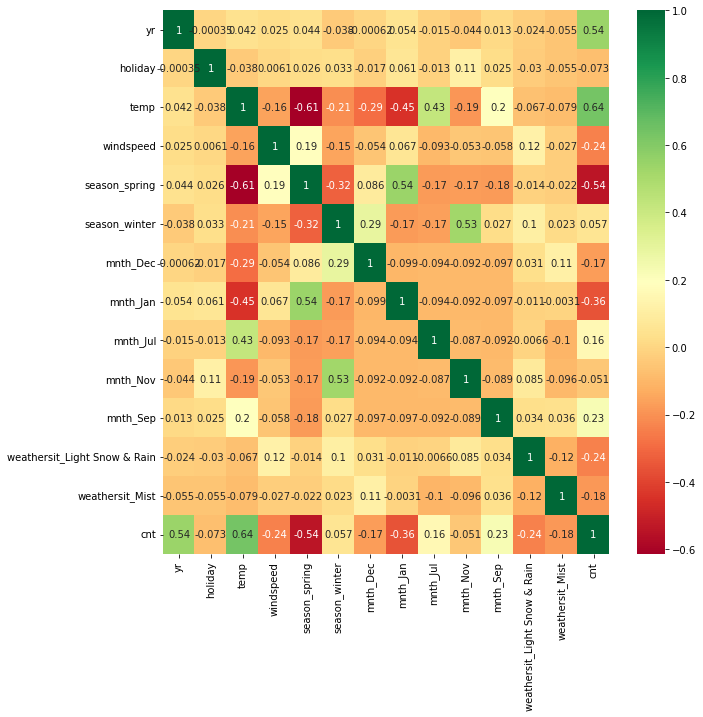

In [ ]:
plt.figure(figsize=(10, 10))
total_cols = selected_cols.append('cnt')
sns.heatmap(train_df[selected_cols].corr(), annot=True, cmap="RdYlGn")
plt.show()

- temp has the highest correlation with the target variable (+0.64).
- yr has the second highest correlation with the target variable (+0.54).
- Spring season has the negative correlation of -0.54.

# Assumptions of Multiple Linear Regression

## Error terms are normally distributed

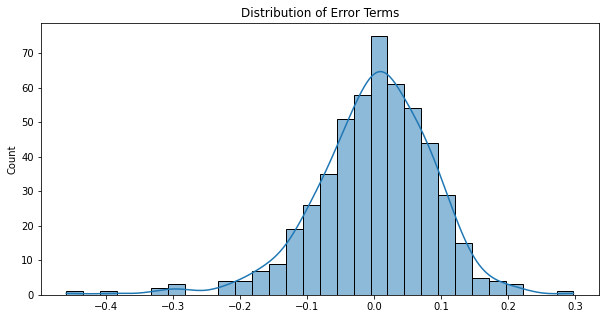

In [215]:
# Residual Analysis on the train dataset

X_train_lr = sm.add_constant(X_train[selected_cols])

y_train_pred = lr_model_rfe.predict(X_train_lr)
error_terms = y_train - y_train_pred

plt.figure(figsize=(10, 5))
plt.title("Distribution of Error Terms")
sns.histplot(error_terms, kde=True)
plt.show()

- The error terms follows a normal distribution with mean as zero.

## Error terms are independant of the predicted values - homoscdasticity

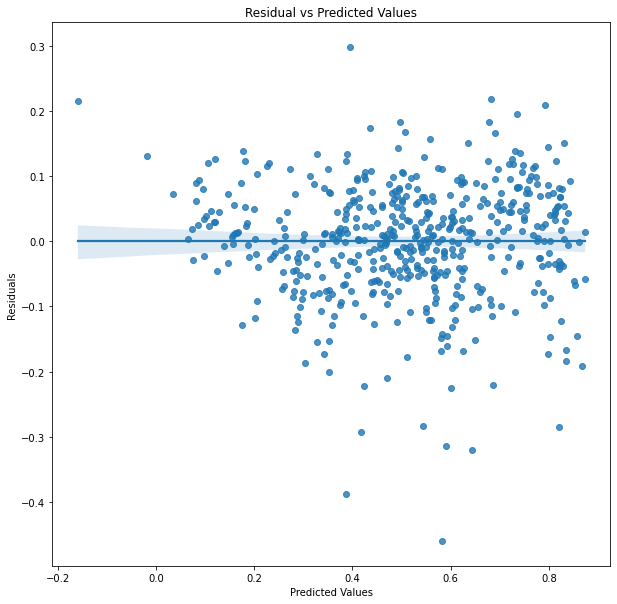

In [216]:
plt.figure(figsize=(10, 10))
sns.regplot(y_train_pred, error_terms)
plt.title('Residual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


- It is clear from the graph that there is no correlation between the predicted values and the error terms.

- There is no visible pattern in the plot.

## There is no multicollinearity

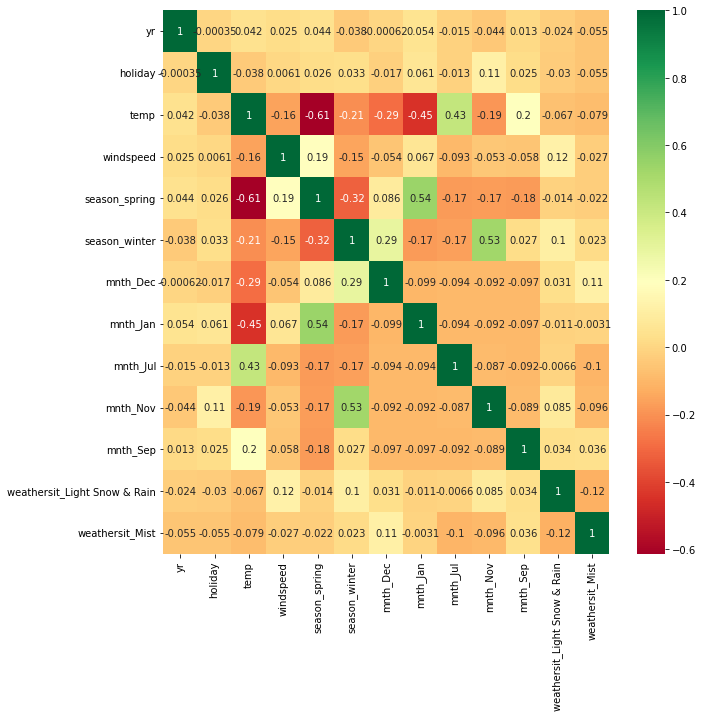

In [217]:
# Creating heatmap for the correlation of all the selected columns

plt.figure(figsize=(10, 10))
sns.heatmap(X_train[selected_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

## linear relationship between the dependant variable and the independant variables

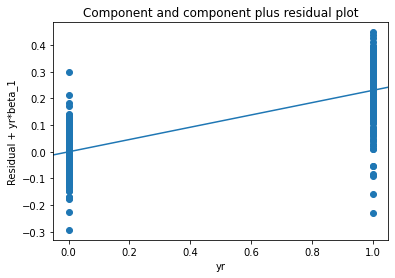

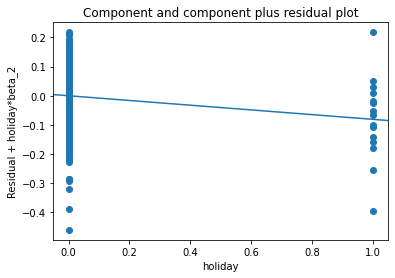

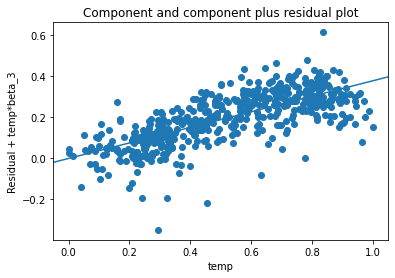

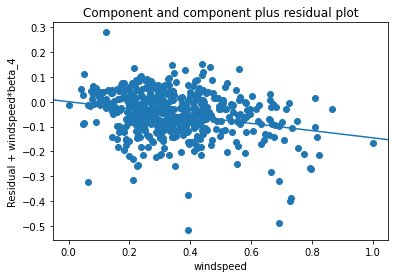

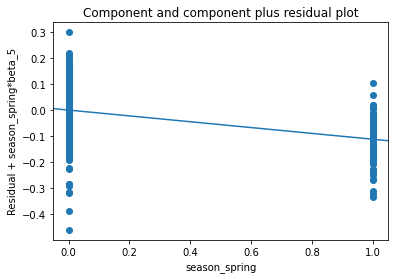

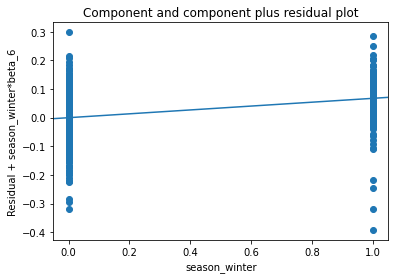

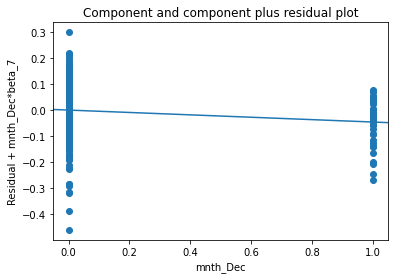

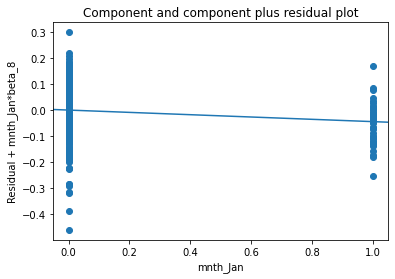

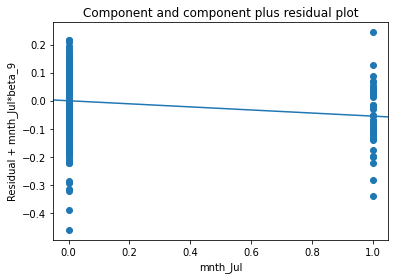

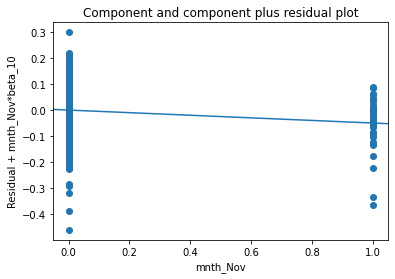

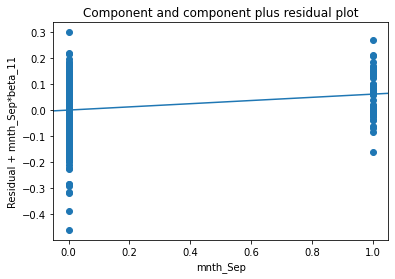

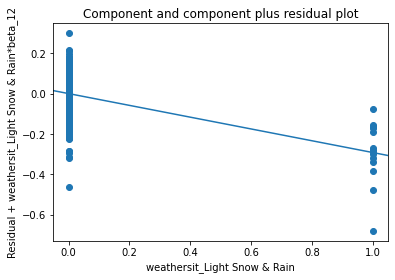

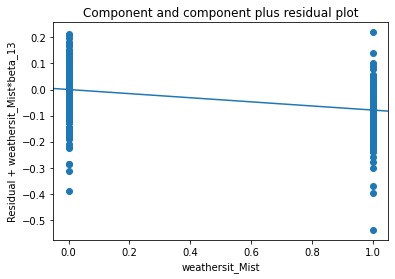

In [218]:
for col in selected_cols:
  sm.graphics.plot_ccpr(lr_model_rfe, col)
  plt.show()

From the plots, there is a clear linear relationship between the dependant and the independant variables.

# Evaluating the predictions on the test dataset

## R-Squared

In [219]:
# scaling test set using the previously created Min-Max scaler
test_df[test_df.columns] = scaler.transform(test_df)

y_test = test_df['cnt']
X_test_lr = test_df.loc[:, test_df.columns != 'cnt']

In [220]:
# Adding the constant field for statsmodel
X_test_lr = sm.add_constant(X_test_lr[selected_cols])

y_test_pred = lr_model_rfe.predict(X_test_lr)

In [221]:
r2_test = round(r2_score(y_test, y_test_pred), 2)
print("R-Squared score on the test set: ", r2_test)

R-Squared score on the test set:  0.82


The R-Squared score on the test set (0.82) is very close to the R-Squared score on the train set (0.83). So we can conclude that there is no overfitting in the model.

## Adjusted R-Squared

In [222]:
# Calculating adjusted R-squared score for the test set
n = X_test_lr.shape[0]
independant_vars_count = X_test_lr.shape[1]
adjusted_r2_test = round(1 - (((1 - r2_test) * n) / (n - independant_vars_count - 1)), 2)

print("Adjusted R-Squared score on the test set: ", adjusted_r2_test)

Adjusted R-Squared score on the test set:  0.81


The Adjusted R-Squared score on the test set (0.81) is also very close to the adjusted R-Squared score on the train set (0.83).